In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# for epoch in range(epoches): # 전체 Epoch이 iteration 되는 횟수 지정 (hyper parameter - 사람이 직접 지정)
#     X_copy = np.copy(X)
#     if is_SGD:  # SGD 인 경우 Shuffle
#         np.random.shuffle(X_copy)
#     batch = len(X_copy) // BATCH_SIZE  # 한번에 처리하는 BATCH_SIZE
#     for batch_count in range(batch):
#         X_batch = np.copy(X_copy[batch_count*BATCH_SIZE : (batch_count+1)*BATCH_SIZE])  # BATCH_SIZE 크기 만큼 X_batch 생성

#     print('Number of epoch : %d' % epoch)

In [4]:
from sklearn.datasets._samples_generator import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

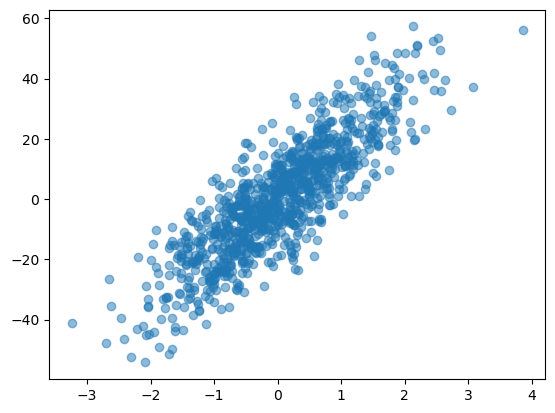

In [13]:
plt.plot(X, y, 'o', alpha=0.5)

In [11]:
from sklearn import linear_model
import imp
imp.reload(linear_model)

/var/folders/w3/8l1p0j1d51s69f3vlw1939ym0000gn/T/ipykernel_70106/1855928113.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'sklearn.linear_model' from '/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/__init__.py'>

In [14]:
# gd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False)
# bgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
# sgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
# msgd_lr = linear_model.LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True) 

## Learning-rate decay (Learning-rate를 감소시킴)

- 일정한 주기로 Learning rate를 감소시키는 방법
- 특정 epoch마다 Learning rate를 감소시킴
- self._eta0 = self._eta0 * self._learning_rate_decay
- Hyper-parameter의 설정의 어려움
- 다른 방법으로, 지수감소 $\alpha = \alpha_0e^{-kt}$, 1/t 감소 $\alpha = \frac{\alpha_0}{(1+kt)}$ 가 있음

## 종료조건 설정

- SGD 과정에서 특정 값 이하로 cost function이 줄어들지 않을 경우 GD를 멈추는 방법
- 성능이 좋아지지 않는/불필요한 연산을 방지함
- 종료조건을 설정 tol > loss - previous_loss (값의 변화가 미미한 경우)
- tol은 hyper-parameter로, 사람이 설정함